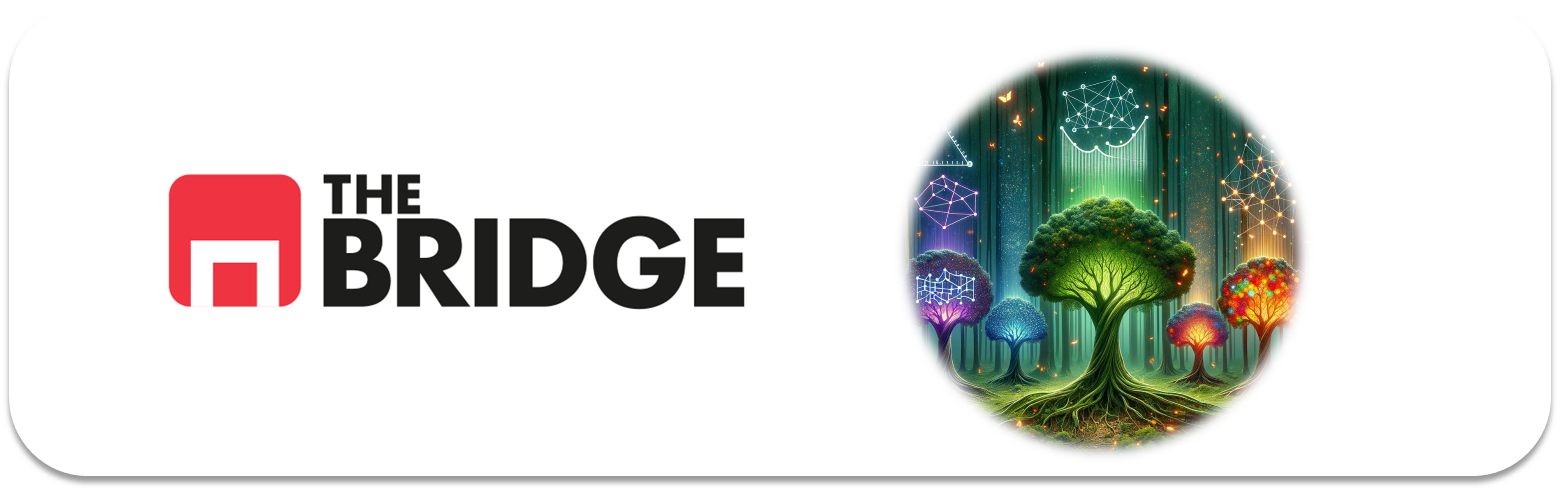

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de Hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

pd.options.mode.copy_on_write = True

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [2]:
#cargamos dataframe y echamos un vistazo
df = pd.read_csv("./data/bank-full.csv", sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
target = "y"

In [5]:
for col in df.columns:
    print(f"Para {col}, unknowns o missings:", end = " ")
    try:
        missings = df[col].value_counts()["unknown"]
        print(f"{missings}, {round(missings/len(df)*100.0,2)}%")
    except:
        print(0)

Para age, unknowns o missings: 0
Para job, unknowns o missings: 288, 0.64%
Para marital, unknowns o missings: 0
Para education, unknowns o missings: 1857, 4.11%
Para default, unknowns o missings: 0
Para balance, unknowns o missings: 0
Para housing, unknowns o missings: 0
Para loan, unknowns o missings: 0
Para contact, unknowns o missings: 13020, 28.8%
Para day, unknowns o missings: 0
Para month, unknowns o missings: 0
Para duration, unknowns o missings: 0
Para campaign, unknowns o missings: 0
Para pdays, unknowns o missings: 0
Para previous, unknowns o missings: 0
Para poutcome, unknowns o missings: 36959, 81.75%
Para y, unknowns o missings: 0


In [6]:
df.shape

(45211, 17)

In [7]:
# # Miro con más detalle las que tienen un porcentaje alto (contact y poutcome)
df.poutcome.value_counts(True)

poutcome
unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: proportion, dtype: float64

In [8]:
df.contact.value_counts(True)

contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: proportion, dtype: float64

Ocurre igual que con el campo anterior, por ahora me lo quedo y al analizarla bivariantemente con el target ya decidiré

En definitiva, las variables con "faltantes" o "unknowns" son todas categóricas, los missings los considero un valor más y veo en el bivariante qué hacer.

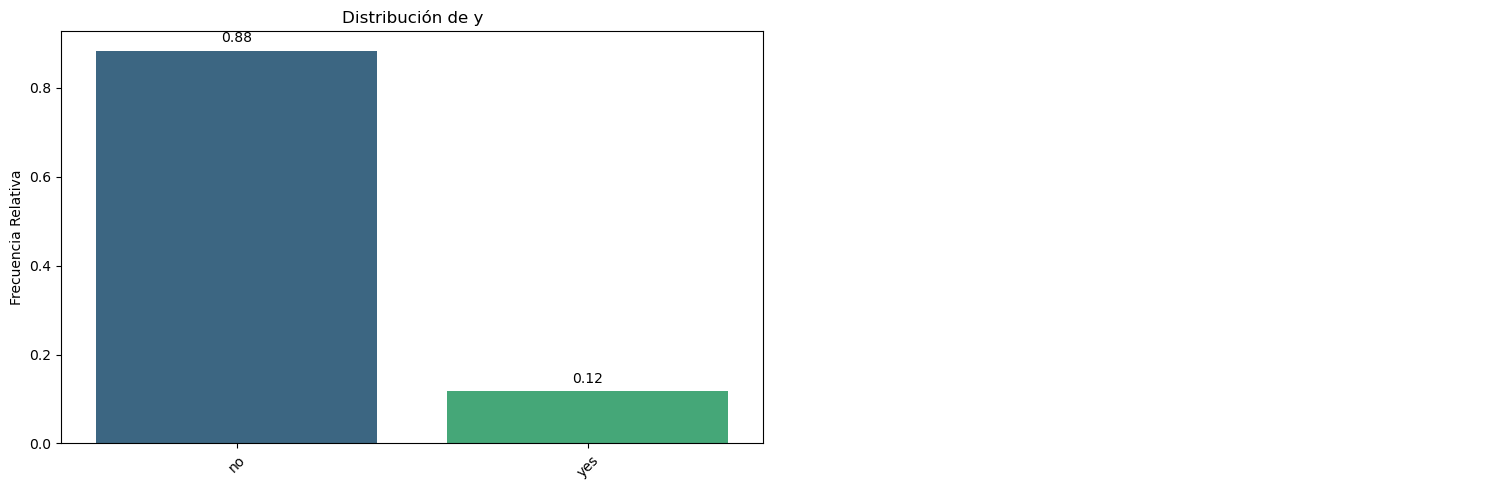

In [9]:
#### Distribución del target
bt.pinta_distribucion_categoricas(df, [target], relativa= True, mostrar_valores= True)

Esto es un ejemplo claro de target no equilibrado o desbalanceado. Under/Oversampling, hiperparámetro de class_weight = 'balanced'

In [10]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

***MINIEDA***

In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.0+ MB


In [13]:
features_cat = train_set.select_dtypes(include = "object").columns.to_list()

if target in features_cat:
    features_cat.remove(target)
    
features_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [14]:
features_num = [col for col in train_set.columns if col not in features_cat and col != target]

features_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

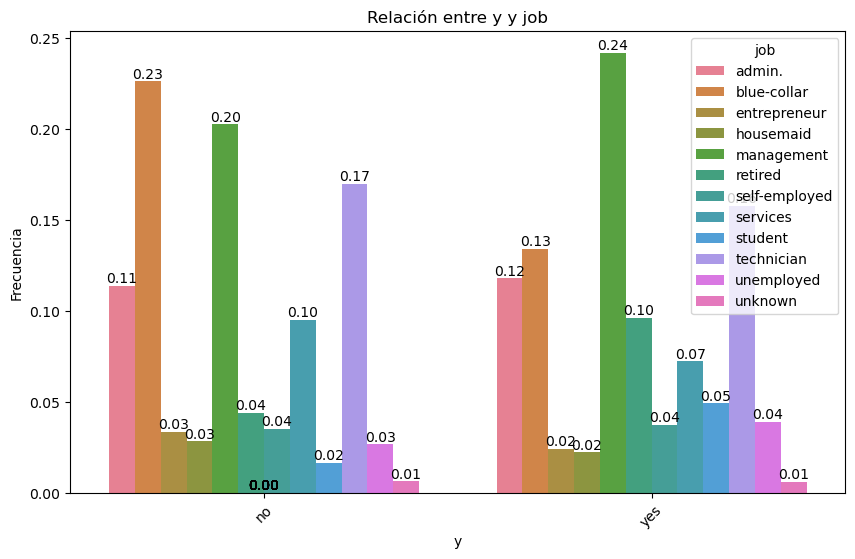

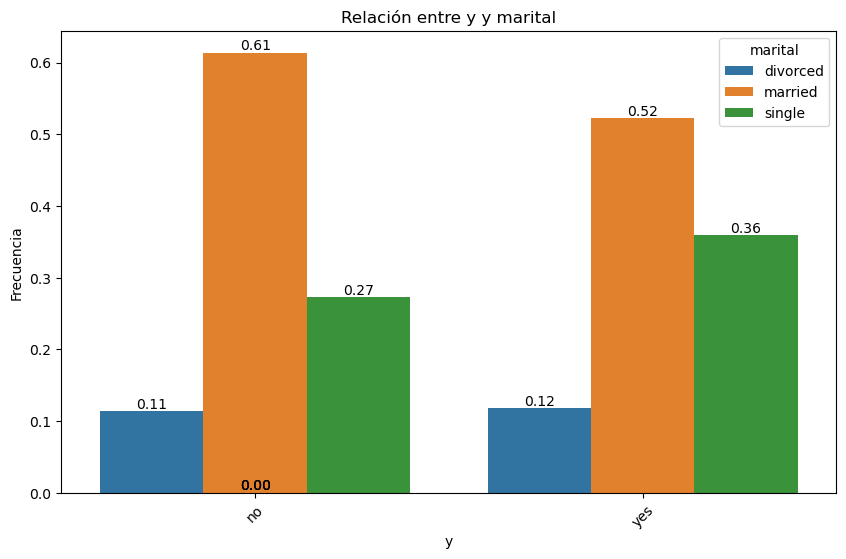

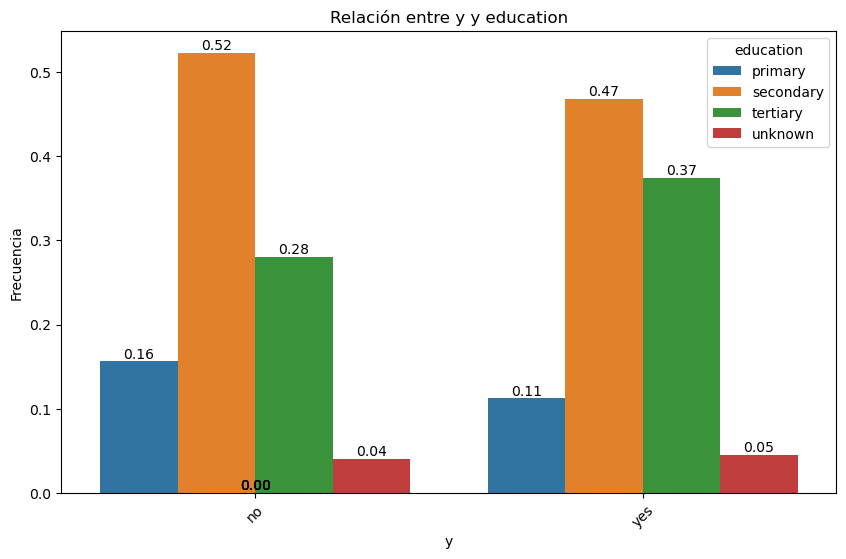

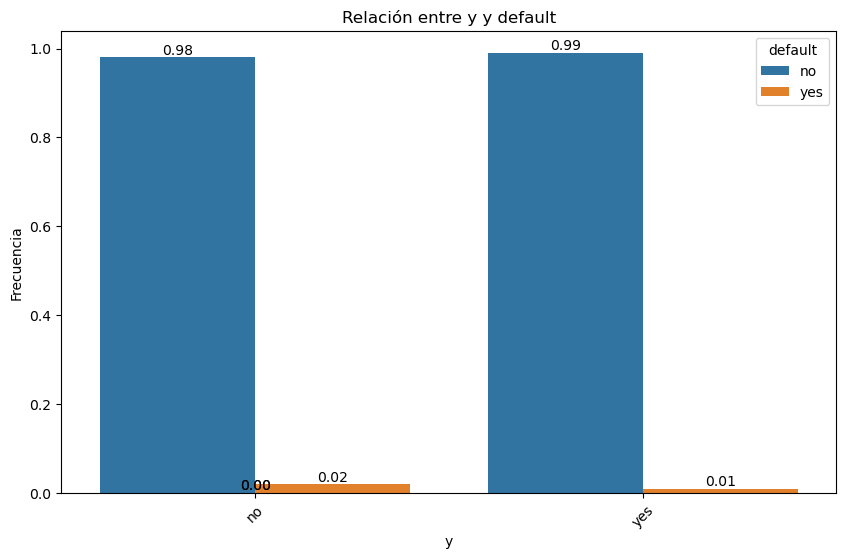

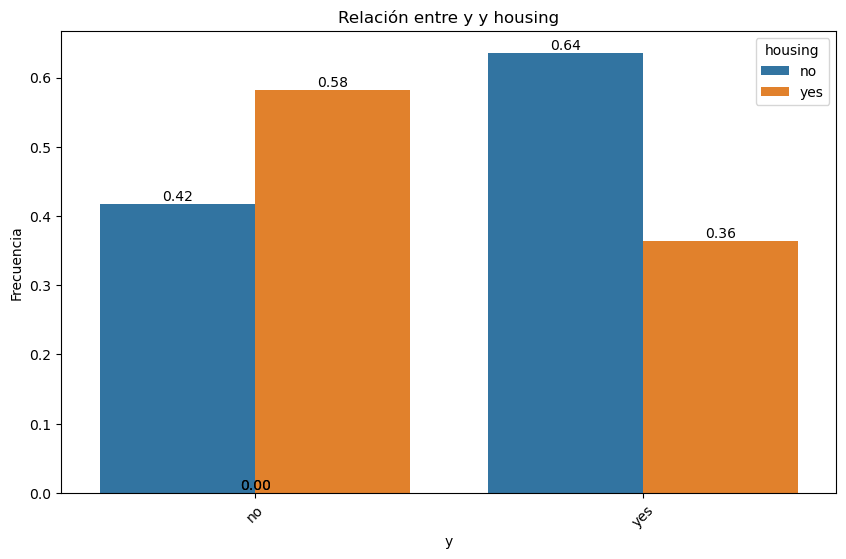

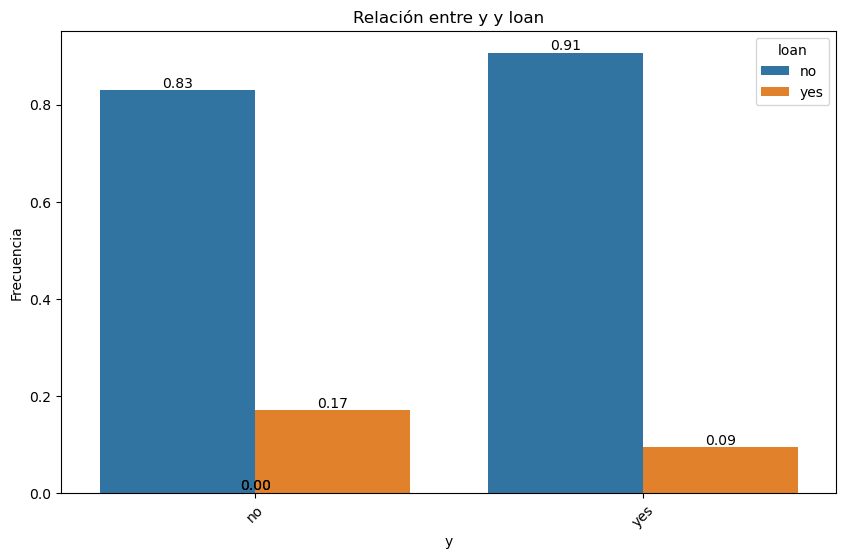

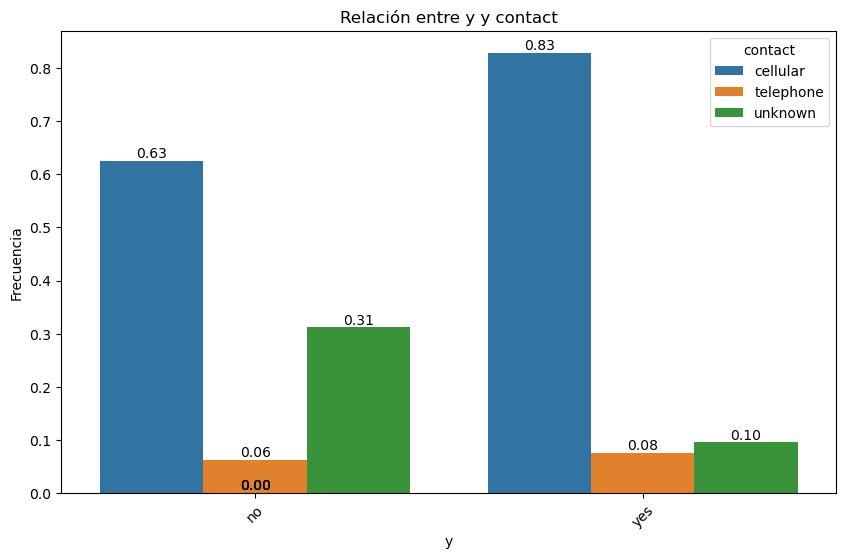

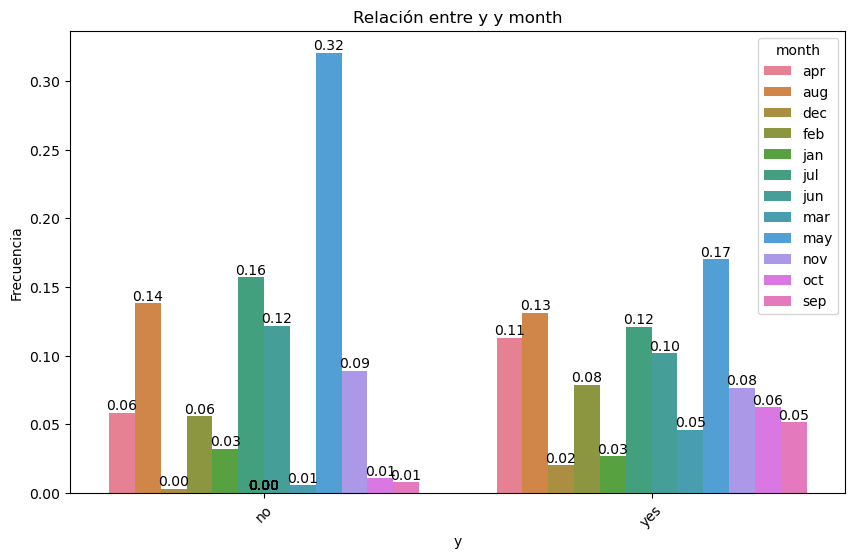

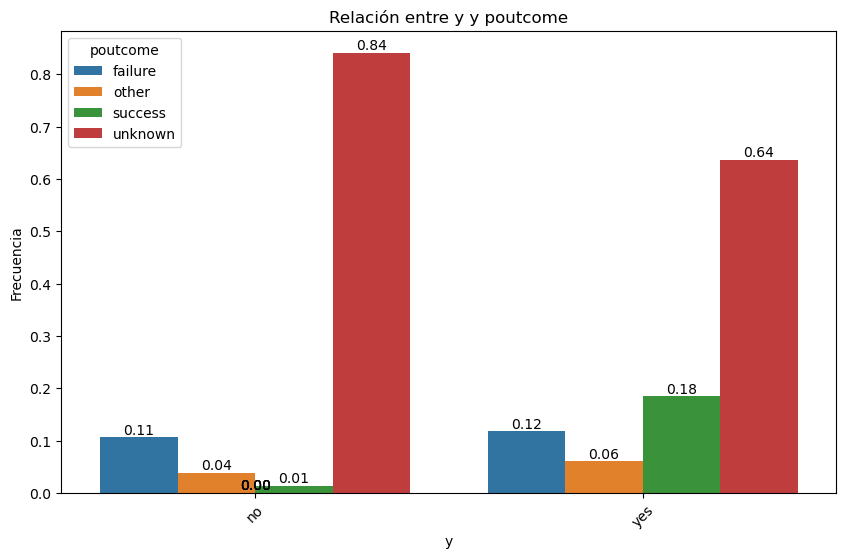

In [15]:
### Analizamos categóricas

for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, col, relative_freq= True, show_values= True)

Parece que default no discrimina y la podríamos quitar, el resto las vamos a mantener para analizar el feature importance del módelo

In [16]:
features_cat.remove("default")
features_cat

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

***Analizamos Numéricas***

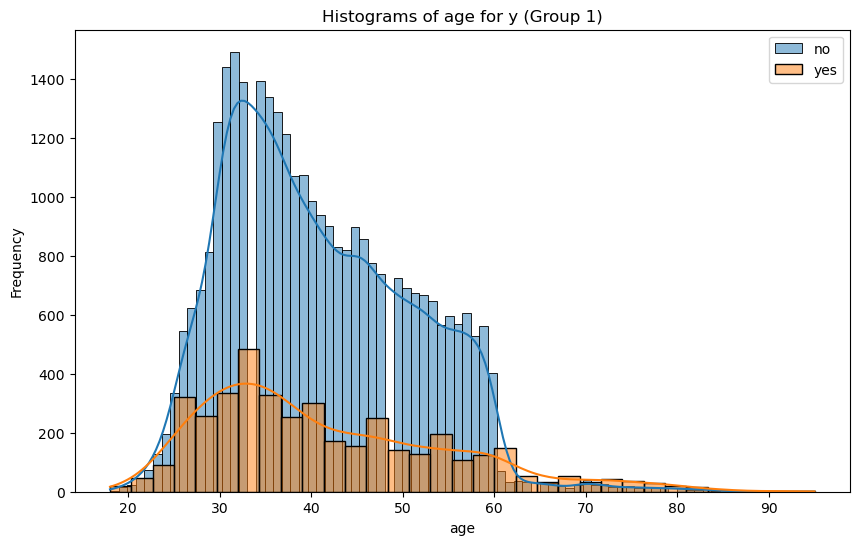

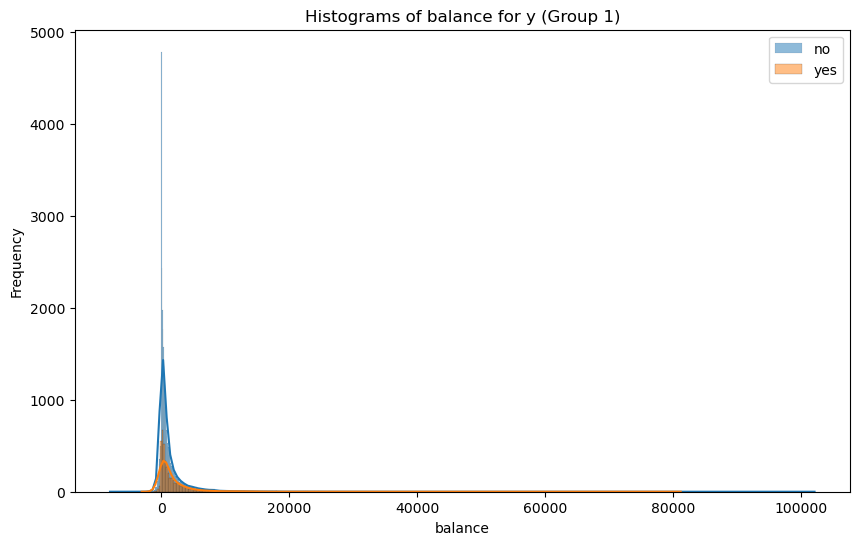

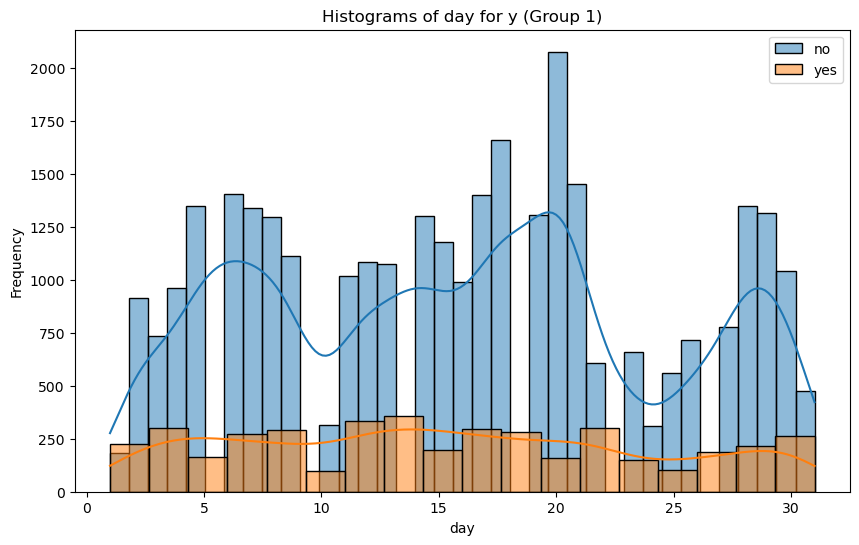

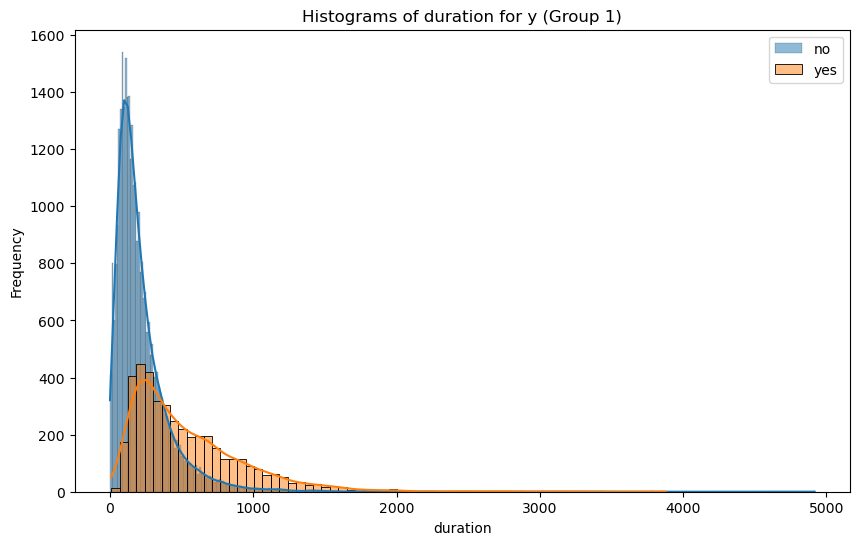

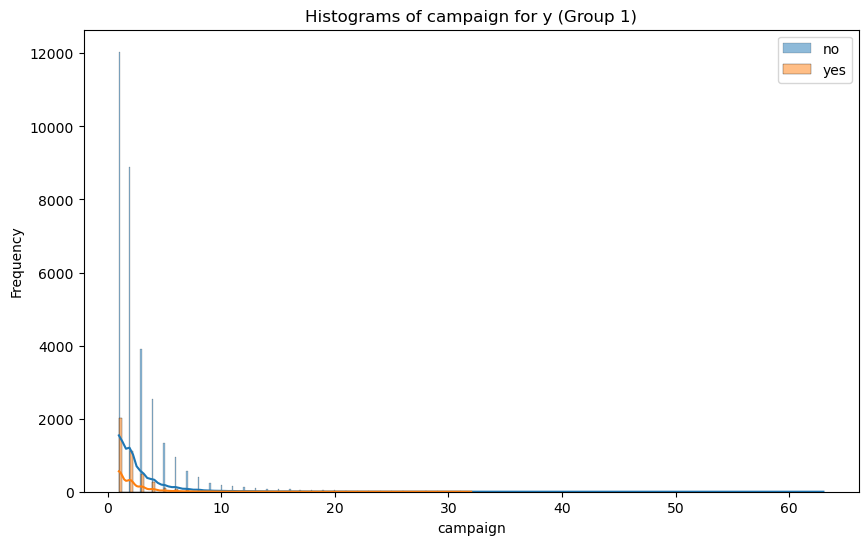

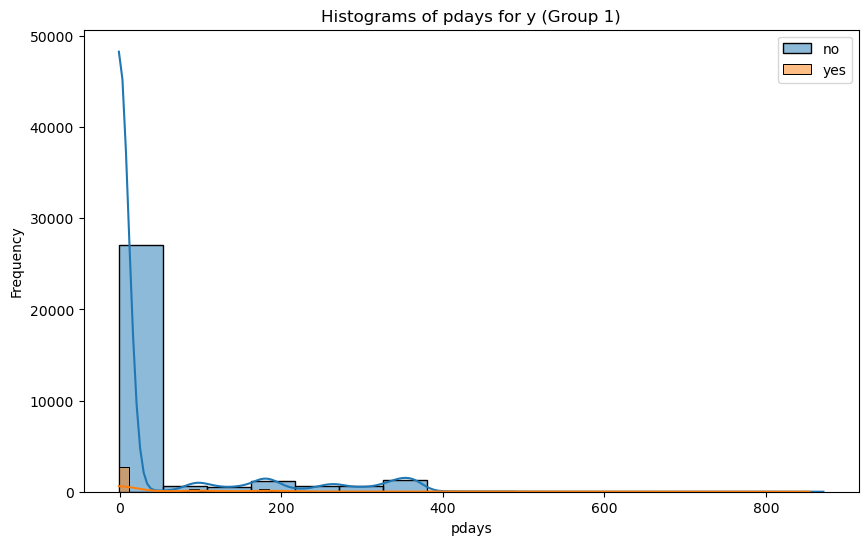

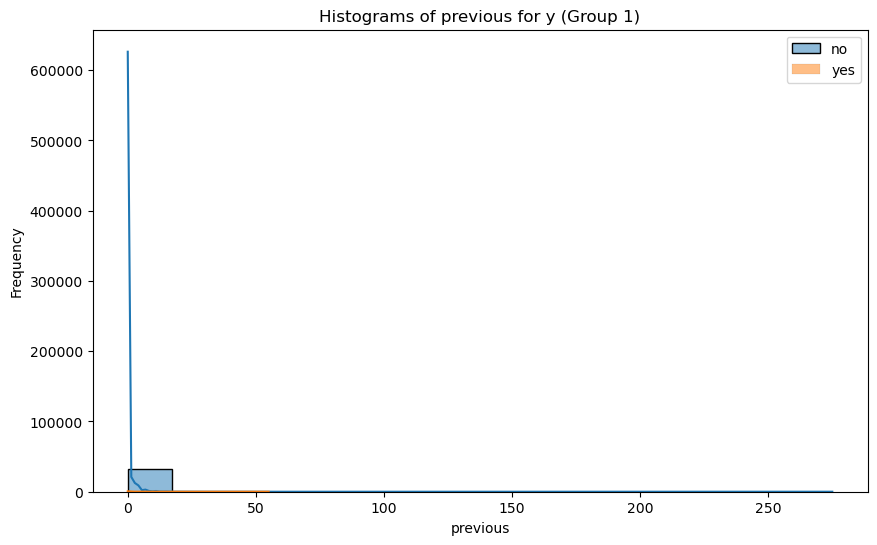

In [17]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

In [18]:
train_set["balance"].describe()

count     36168.000000
mean       1361.046146
std        3023.083187
min       -8019.000000
25%          70.000000
50%         447.000000
75%        1429.000000
max      102127.000000
Name: balance, dtype: float64

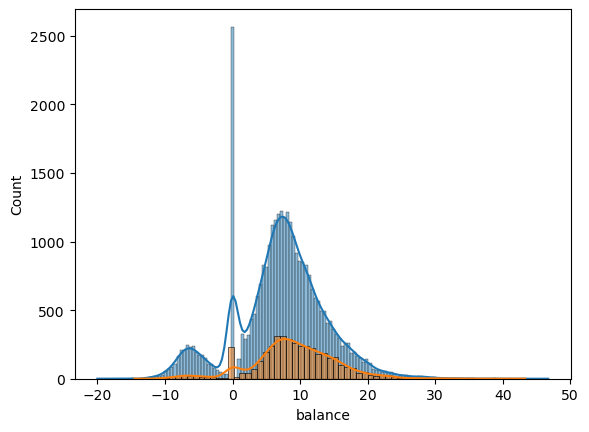

In [19]:
## Si queremos ver alguna variable con mayor detalle podemos sacar sus histogramas individuales y transformar
col = "balance"

sns.histplot(np.cbrt(train_set[col][train_set["y"] == "no"]), kde=True) # Raíz cubíca ya que hay valores negativos grandes
sns.histplot(np.cbrt(train_set[col][train_set["y"] == "yes"]), kde=True)
plt.show()

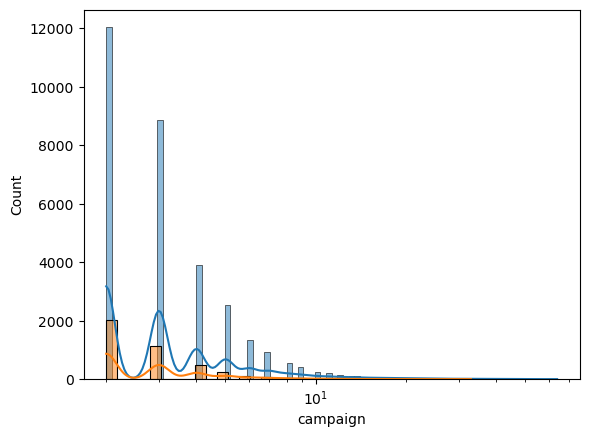

In [20]:
col = "campaign"
sns.histplot(train_set[col][train_set["y"] == "no"]+1, log_scale=10, kde=True) # Log(x+1) usando el argumento de log_scale
sns.histplot(train_set[col][train_set["y"] == "yes"]+1, log_scale=10, kde=True)
plt.show()

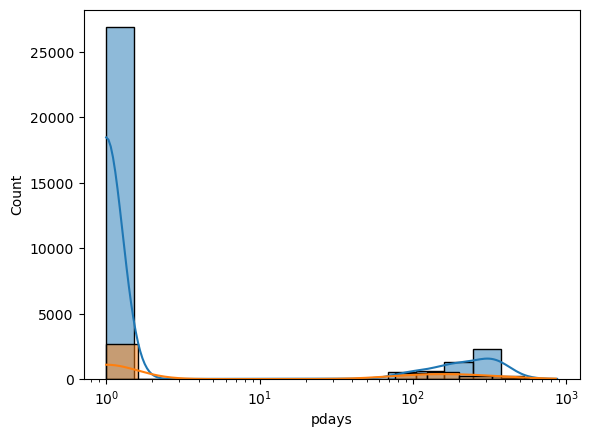

In [21]:
col = "pdays"
sns.histplot(train_set[col][train_set["y"] == "no"]+2, log_scale=10, kde=True) # Log(x+2) usando el argumento de log_scale
sns.histplot(train_set[col][train_set["y"] == "yes"]+2, log_scale=10, kde=True)
plt.show()

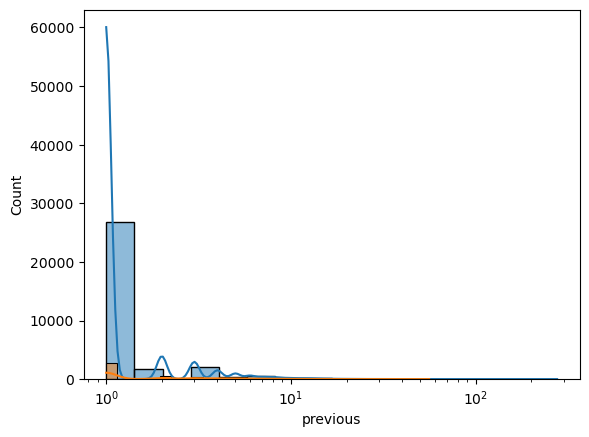

In [22]:
col = "previous"
sns.histplot(train_set[col][train_set["y"] == "no"]+1, log_scale=10, kde=True) # Log(x+1) usando el argumento de log_scale
sns.histplot(train_set[col][train_set["y"] == "yes"]+1, log_scale=10, kde=True)
plt.show()


In [23]:
features_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

***Tratamiento***

*Categoricas*

In [25]:
train_set[features_cat].nunique()

job          12
marital       3
education     4
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

Sabíamos que "housing" y "loan" son de tipo binario, por lo que las transformamos con máscaras de booleanos
Y "month" como sabemos que una ordinal, la transformamos con mapeo usando un diccionario
El resto las convertiremos en One-hot encoding con pd.get_dummies()

In [26]:
train_set["housing"] == "yes" # Máscara de booleanos de la variable housing

3344      True
17965     True
18299    False
10221     True
32192    False
         ...  
11284    False
44732    False
38158     True
860      False
15795     True
Name: housing, Length: 36168, dtype: bool

In [27]:
train_set["housing"] = train_set["housing"] == "yes"
train_set["loan"] = train_set["loan"] == "yes"

test_set["housing"] = test_set["housing"] == "yes" # Lo mismo que hagamos en train, lo hacemos en test
test_set["loan"] = test_set["loan"] == "yes"

features_cat.remove("housing") # las quitamos de nuestra lista para no pasarlas por el One-hot encoding
features_cat.remove("loan")

In [28]:
## Ahora tratamos month
month_dic = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

In [29]:
train_set["month"] = train_set["month"].map(month_dic)
test_set["month"] = test_set["month"].map(month_dic)

In [30]:
features_cat.remove("month") # la quitamos de nuestra lista para no pasarla por el One-hot encoding

In [31]:
# sci-kit learn OneHotEncoder es una alternativa a pd.get_dummies() por si queréis investigarlo

train_set = pd.get_dummies(train_set, columns = features_cat, dtype = int)
test_set = pd.get_dummies(test_set, columns = features_cat, dtype = int)

In [33]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  36168 non-null  int64 
 1   default              36168 non-null  object
 2   balance              36168 non-null  int64 
 3   housing              36168 non-null  bool  
 4   loan                 36168 non-null  bool  
 5   day                  36168 non-null  int64 
 6   month                36168 non-null  int64 
 7   duration             36168 non-null  int64 
 8   campaign             36168 non-null  int64 
 9   pdays                36168 non-null  int64 
 10  previous             36168 non-null  int64 
 11  y                    36168 non-null  object
 12  job_admin.           36168 non-null  int64 
 13  job_blue-collar      36168 non-null  int64 
 14  job_entrepreneur     36168 non-null  int64 
 15  job_housemaid        36168 non-null  int64 
 16  job_ma

In [34]:
train_set.shape # Comprobamos que las dimensiones concuerdan

(36168, 38)

In [35]:
test_set.shape

(9043, 38)

In [36]:
train_set.columns[~train_set.columns.isin(test_set.columns)] # la virgulilla nos ayuda a ver hacer lo inversa de la máscara

Index([], dtype='object')

Es decir todas las columnas en train están en test. La virgulilla es la negación de lo que viene luego

Ahora tratamos las features_num

En principio no pasa nada por no escalar porque los árboles no lo requieren, podemos hacerlo y probar dos modelos.
PERO como hay que hacer un baseline con un regresor logístico, al reg. logístico sí que le afecta la escala ¡y mucho!

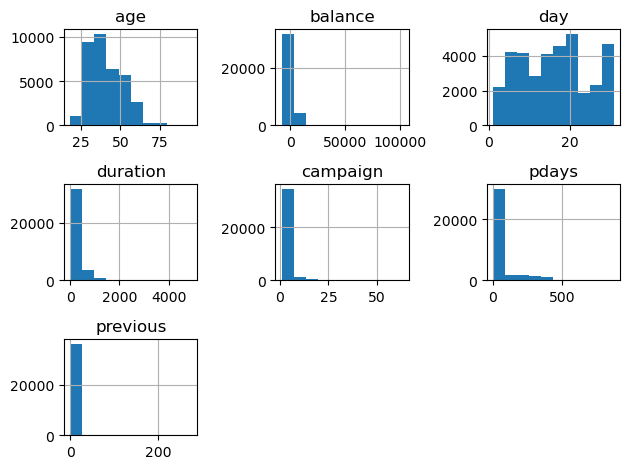

In [37]:
train_set[features_num].hist()
plt.tight_layout()

In [38]:
## Transformaremos todas excepto "age" y "day"
## Y recuerda que pdays tiene un valor -1 del que podemos extraer una nueva variable categórica que llamaremos "contacted_before"

In [39]:
train_set["pdays"] != -1

3344     False
17965    False
18299    False
10221    False
32192    False
         ...  
11284    False
44732     True
38158    False
860      False
15795    False
Name: pdays, Length: 36168, dtype: bool

In [40]:
train_set["contacted_before"] = train_set["pdays"] != -1

In [41]:
test_set["contacted_before"] = test_set["pdays"] != -1

In [42]:
# train_set["contacted_before"] = train_set["pdays"].apply(before_contact) # en caso de definir una función de usuario "before_contact"
# train_set["contacted_before"] = train_set["pdays"].apply(lambda row: 1 if row >= 0 else 0)
# test_set["contacted_before"] = test_set["pdays"].apply(lambda row: 1 if row >= 0 else 0)

train_set.contacted_before.value_counts(True)

contacted_before
False    0.817186
True     0.182814
Name: proportion, dtype: float64

In [43]:
## Analizamos la nueva variable como categórica y vemos como es la distribución de pdays quitando el valor -1

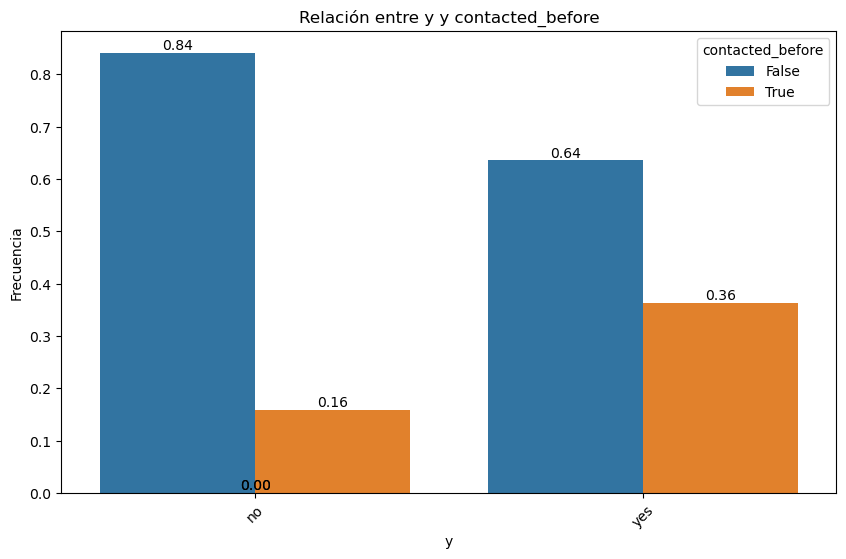

In [44]:
bt.plot_categorical_relationship_fin(train_set, target, "contacted_before", relative_freq= True, show_values= True)

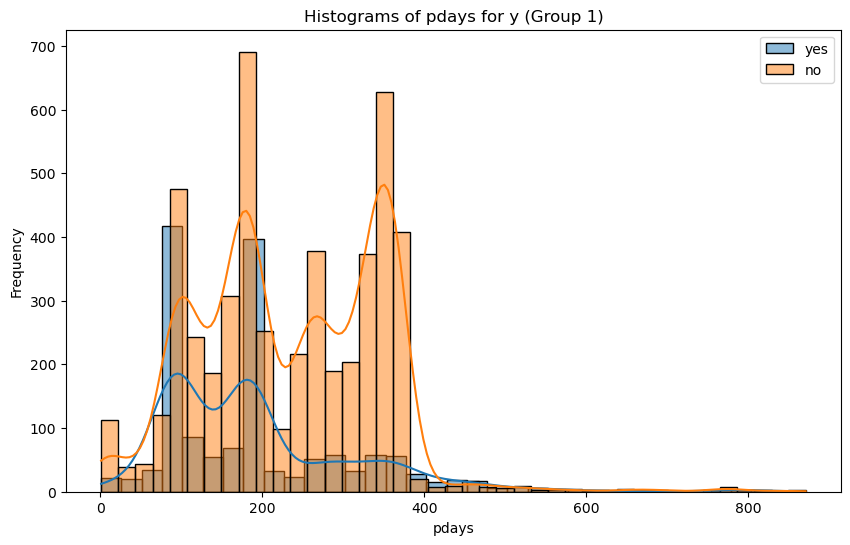

In [45]:
bt.plot_grouped_histograms(train_set[train_set.contacted_before == 1], cat_col= target, num_col= "pdays", group_size= 2)

Incluimos "contacted before" en nuestra lista de categóricas

In [47]:
features_cat.append("contacted_before")

train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

***En base a lo aprendido, transformamos y escalamos Numéricas***

In [48]:
features_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [49]:
train_set.sample(30)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contacted_before
5721,48,no,145,True,False,26,5,14,38,-1,...,1,0,0,0,1,0,0,0,1,False
42743,48,no,1180,False,False,27,1,142,1,238,...,0,0,1,0,0,0,1,0,0,True
39905,38,no,5115,True,False,2,6,318,1,95,...,0,0,1,0,0,0,0,1,0,True
31078,35,no,188,True,False,16,2,75,3,200,...,0,0,1,0,0,1,0,0,0,True
42079,26,no,44,False,False,30,10,217,1,-1,...,0,0,1,0,0,0,0,0,1,False
1161,50,no,362,True,False,8,5,201,2,-1,...,0,0,0,0,1,0,0,0,1,False
24163,37,no,1016,True,True,12,11,24,1,-1,...,0,0,0,1,0,0,0,0,1,False
4249,36,no,3457,False,False,19,5,103,4,-1,...,0,0,0,0,1,0,0,0,1,False
11382,38,no,499,False,False,19,6,240,6,-1,...,0,1,0,0,1,0,0,0,1,False
1152,35,no,788,True,False,7,5,297,3,-1,...,1,0,0,0,1,0,0,0,1,False


In [50]:
train_set_scaled["balance"] = np.cbrt(train_set_scaled["balance"])
train_set_scaled["duration"] = np.log(train_set_scaled["duration"] + 1)
train_set_scaled["campaign"] = np.log(train_set_scaled["campaign"])
train_set_scaled["pdays"] = np.log(train_set_scaled["pdays"] + 2)
train_set_scaled["previous"] = np.log(train_set_scaled["previous"] + 1)

In [51]:
test_set_scaled["balance"] = np.cbrt(test_set_scaled["balance"])
test_set_scaled["duration"] = np.log(test_set_scaled["duration"] + 1)
test_set_scaled["campaign"] = np.log(test_set_scaled["campaign"])
test_set_scaled["pdays"] = np.log(test_set_scaled["pdays"] + 2)
test_set_scaled["previous"] = np.log(test_set_scaled["previous"] + 1)

In [52]:
train_set_scaled[features_num]

,age,balance,day,duration,campaign,pdays,previous
3344,41,9.468966,15,4.290459,0.000000,0.000000,0.000000
17965,49,11.226701,30,5.598422,0.693147,0.000000,0.000000
18299,42,15.662189,31,4.875197,1.386294,0.000000,0.000000
10221,37,-4.918685,11,5.929589,2.397895,0.000000,0.000000
32192,56,15.180052,15,5.579730,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...
11284,44,10.192921,18,7.646831,0.000000,0.000000,0.000000
44732,23,7.979112,8,5.351858,0.000000,4.543295,0.693147
38158,34,10.961296,15,5.480639,0.000000,0.000000,0.000000
860,33,5.484807,7,4.718499,0.000000,0.000000,0.000000


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_set_scaled[features_num] = scaler.fit_transform(train_set_scaled[features_num])
test_set_scaled[features_num] = scaler.transform(test_set_scaled[features_num])

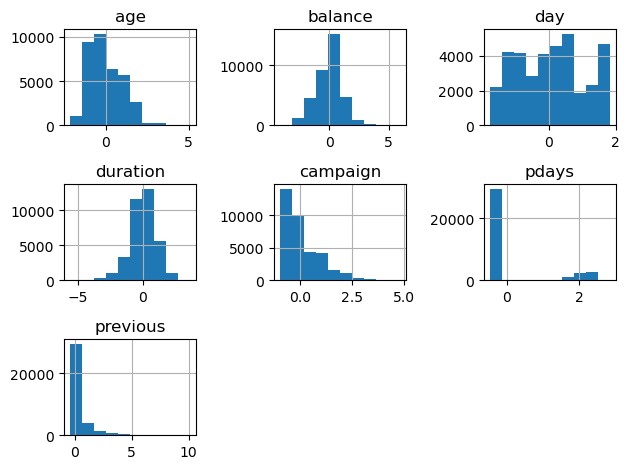

In [55]:
train_set_scaled[features_num].hist()
plt.tight_layout()

In [58]:
features_cat_sel = features_cat.copy() 


In [59]:
features_cat.append("contacted_before")


In [61]:
features_cat_sel=['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'contacted_before']# Ojo, recuerda que hemos hecho get_dummies, las columnas del dataset ya no son las que tenemos en nuestra selección

In [62]:
features_cat_sel

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'contacted_before']

In [63]:
train_set.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'contacted_before'],
      dtype='object')

In [64]:
features_encoded_cat_sel = []

for col in features_cat_sel:
    defintive_col = [col_2 for col_2 in train_set.columns if col_2.startswith(col)]
    features_encoded_cat_sel += defintive_col

features_encoded_cat_sel

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'housing',
 'loan',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'contacted_before',
 'month',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'contacted_before']

In [ ]:
## En este punto podrías transformar el target en etiquetas 0 y 1 si quieres

# def convertir(row):
#     return 1 if row == "yes" else 0 

# train_set[target] = train_set[target].apply(lambda row: 1 if row == "yes" else 0) # apply(convertir)
# test_set[target] = test_set[target].apply(lambda row: 1 if row == "yes" else 0)

In [65]:
X_train = train_set[features_encoded_cat_sel + features_num].copy()
X_train_scaled = train_set_scaled[features_encoded_cat_sel + features_num].copy()
y_train = train_set[target]

X_test = test_set[features_encoded_cat_sel + features_num].copy()
X_test_scaled = test_set_scaled[features_encoded_cat_sel + features_num].copy()
y_test = test_set[target]

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr_clf = LogisticRegression(max_iter = 1000)
tree_clf = DecisionTreeClassifier(random_state = 42) # Los árboles sin limite sobreajustan -> esto lo dejamos a modo de ejemplo

lr_clf.fit(X_train_scaled, y_train) # Entrenamos el regresor logístico

LogisticRegression(max_iter=1000)

In [67]:
print(classification_report(y_train, lr_clf.predict(X_train_scaled)))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     31970
         yes       0.64      0.33      0.43      4198

    accuracy                           0.90     36168
   macro avg       0.78      0.65      0.69     36168
weighted avg       0.89      0.90      0.89     36168



In [68]:
print(classification_report(y_test, lr_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7952
         yes       0.66      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [69]:
tree_clf.fit(X_train, y_train) # Entrenamos el árbol de decisión

DecisionTreeClassifier(random_state=42)

In [70]:
print(classification_report(y_train, tree_clf.predict(X_train))) # Overfitting

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     31970
         yes       1.00      1.00      1.00      4198

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



In [71]:
print(classification_report(y_test, tree_clf.predict(X_test)))

              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7952
         yes       0.48      0.50      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.87      0.88      9043



In [72]:
from sklearn.model_selection import GridSearchCV # o en caso de tener un grid muy grande -> RandozimedSearchCV

param_grid = {
    "max_depth": [1,2,8,10],
    "min_samples_leaf": [1,10,20,100],
    "max_features": ["sqrt", "log2", None],
    "class_weight": ["balanced", None]
}

tree_clf = DecisionTreeClassifier(random_state= 42)

tree_grid = GridSearchCV(tree_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy") # Depende del impacto en el problema de negocio

tree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [1, 2, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 20, 100]},
             scoring='balanced_accuracy')

In [73]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [74]:
tree_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 20}

In [75]:
tree_grid.best_score_

np.float64(0.8365664720350253)

In [76]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=20, random_state=42)

In [77]:
y_pred = tree_grid.best_estimator_.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          no       0.99      0.82      0.89     31970
         yes       0.40      0.93      0.56      4198

    accuracy                           0.83     36168
   macro avg       0.69      0.87      0.72     36168
weighted avg       0.92      0.83      0.85     36168



In [78]:
y_pred = tree_grid.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.98      0.80      0.88      7952
         yes       0.37      0.87      0.52      1091

    accuracy                           0.81      9043
   macro avg       0.68      0.83      0.70      9043
weighted avg       0.90      0.81      0.84      9043



In [79]:
tree_grid.best_estimator_.feature_importances_

array([6.52999797e-04, 2.45814434e-03, 4.90885954e-05, 0.00000000e+00,
       1.41073509e-03, 2.95821150e-04, 0.00000000e+00, 4.66286946e-04,
       0.00000000e+00, 6.04760610e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.63172656e-03, 4.58453653e-04, 9.71155451e-06,
       1.54120137e-18, 1.50928975e-03, 0.00000000e+00, 4.71928421e-02,
       6.82068298e-03, 2.28824773e-04, 3.41849157e-04, 1.07679275e-01,
       0.00000000e+00, 1.24366711e-01, 0.00000000e+00, 0.00000000e+00,
       1.16640569e-01, 0.00000000e+00, 0.00000000e+00, 1.45876434e-02,
       2.34959411e-02, 5.60903165e-02, 4.62715358e-01, 5.15758495e-03,
       2.49950910e-02, 1.40292505e-04])

In [80]:
tree_grid.best_estimator_.feature_names_in_

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing', 'loan', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'contacted_before',
       'month', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'contacted_before', 'age', 'balance', 'day',
       'duration', 'campaign', 'pdays', 'previous'], dtype=object)

In [81]:
df_feat_importance = pd.DataFrame({"features": tree_grid.best_estimator_.feature_names_in_, "importancia": tree_grid.best_estimator_.feature_importances_}).sort_values("importancia",ascending=False)
df_feat_importance

,features,importancia
34,duration,4.627154e-01
25,month,1.243667e-01
28,poutcome_success,1.166406e-01
23,contact_unknown,1.076793e-01
33,day,5.609032e-02
19,housing,4.719284e-02
36,pdays,2.499509e-02
32,balance,2.349594e-02
31,age,1.458764e-02
20,loan,6.820683e-03


EXTRA: Usamos el feature importance del modelo para hacer selección de features y valorar los resultados

In [82]:
num_features = 10
df_feat_importance.iloc[:num_features,:]

,features,importancia
34,duration,0.462715
25,month,0.124367
28,poutcome_success,0.116641
23,contact_unknown,0.107679
33,day,0.056090
19,housing,0.047193
36,pdays,0.024995
32,balance,0.023496
31,age,0.014588
20,loan,0.006821


In [83]:
new_features_sel = df_feat_importance.iloc[:num_features,:]["features"].to_list()
new_features_sel

['duration',
 'month',
 'poutcome_success',
 'contact_unknown',
 'day',
 'housing',
 'pdays',
 'balance',
 'age',
 'loan']

In [85]:
X_train = train_set[new_features_sel].copy()
X_train_scaled = train_set_scaled[new_features_sel].copy()
y_train = train_set[target]

X_test = test_set[new_features_sel].copy()
X_test_scaled = test_set_scaled[new_features_sel].copy()
y_test = test_set[target]

In [86]:
lr_clf = LogisticRegression(max_iter = 1000)
tree_clf = DecisionTreeClassifier(random_state= 42)

lr_clf.fit(X_train_scaled, y_train) # Entrenamos un nuevo regresor logístico

LogisticRegression(max_iter=1000)

In [87]:
print(classification_report(y_train, lr_clf.predict(X_train_scaled)))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     31970
         yes       0.65      0.32      0.43      4198

    accuracy                           0.90     36168
   macro avg       0.78      0.65      0.69     36168
weighted avg       0.89      0.90      0.89     36168



In [88]:
print(classification_report(y_test, lr_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7952
         yes       0.64      0.31      0.42      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [89]:
tree_clf.fit(X_train, y_train) # Entrenamos de nuevo el árbol de decisión

DecisionTreeClassifier(random_state=42)

In [90]:
print(classification_report(y_train, tree_clf.predict(X_train))) # Overfitting

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     31970
         yes       1.00      1.00      1.00      4198

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



In [91]:
print(classification_report(y_test, tree_clf.predict(X_test)))

              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7952
         yes       0.47      0.47      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



In [92]:
param_grid = {
    "max_depth": [1,2,8,10],
    "min_samples_leaf": [1,10,20,100],
    "max_features": ["sqrt", "log2", None],
    "class_weight": ["balanced", None]
}

tree_clf = DecisionTreeClassifier(random_state= 42)

tree_grid = GridSearchCV(tree_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy") # Depende del impacto en el problema de negocio

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [1, 2, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 20, 100]},
             scoring='balanced_accuracy')

In [93]:
tree_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 20}

In [94]:
tree_grid.best_score_

np.float64(0.8398781257643299)

In [95]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=20, random_state=42)

In [96]:
y_pred = tree_grid.best_estimator_.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          no       0.99      0.81      0.89     31970
         yes       0.39      0.93      0.55      4198

    accuracy                           0.82     36168
   macro avg       0.69      0.87      0.72     36168
weighted avg       0.92      0.82      0.85     36168



In [97]:
y_pred = tree_grid.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.98      0.80      0.88      7952
         yes       0.37      0.87      0.52      1091

    accuracy                           0.80      9043
   macro avg       0.67      0.83      0.70      9043
weighted avg       0.90      0.80      0.83      9043



In [98]:
df_feat_importance = pd.DataFrame({"features": tree_grid.best_estimator_.feature_names_in_, "importancia": tree_grid.best_estimator_.feature_importances_}).sort_values("importancia",ascending=False)
df_feat_importance

,features,importancia
0,duration,0.469291
1,month,0.125906
2,poutcome_success,0.117384
3,contact_unknown,0.108366
4,day,0.057563
5,housing,0.047689
6,pdays,0.026241
7,balance,0.025734
8,age,0.014963
9,loan,0.006864


En conclusión, si reentrenamos nuestros modelos con solo las 10 features más importantes vemos que sus metricas siguen siendo prácticamente iguales.

Prueba a modificar el criterio del número de features seleccionadas para ver en qué momento el rendimiento del modelo empeora significativamente.